### 8. Feladatsor

Rendmérés pontos megoldás nélkül, linearizáció

#### 1. Feladat

Tekintsük az
$$
\begin{align}
     \dot x &= x^2 \quad [0, 1]\text{-en}\\
     x_0 &= .5
\end{align}
$$
feladatot. Oldjuk is meg az EE módszerrel.

In [1]:
function [ts, ys] = explicit_euler(f, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;
    
    for n=1:(numel(ts) - 1)
        h = ts(n+1) - ts(n);
        
        k1 = f(ts(n), ys(:, n));

        ys(:, n+1) = ys(:, n) + h * k1;
    end
end

In [2]:
[ts, ys] = explicit_euler(@(t, x)(x.^2), 0:.1:1, .5);

a) Megoldásainkat hasonlítsuk össsze a pontos megoldással, a végeredmény legyen a hibavektorok (valamilyen normában mért) hossza.

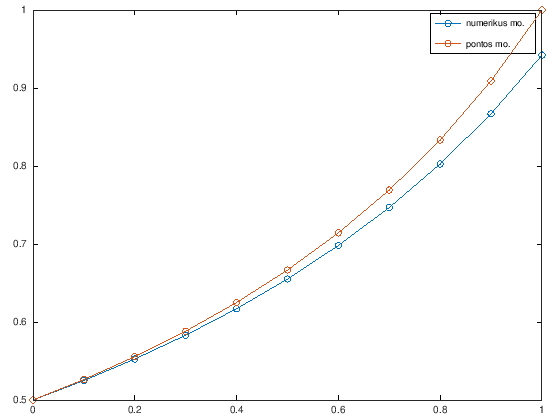

In [3]:
plot(ts, ys, 'o-'); hold on
plot(ts, 1./(2-ts), '-o')

legend('numerikus mo.', 'pontos mo.')

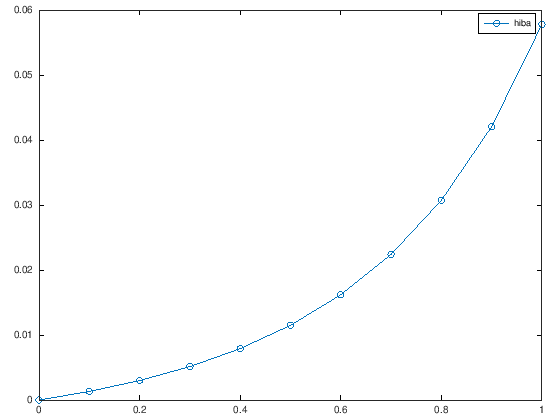

In [4]:
err = abs(ys - 1./(2-ts));

plot(ts, err, 'o-')
legend('hiba')


b) A feladat segítségével mérjük le a módszer rendjét.

In [5]:
function errs = measure_errors(hs, method)
    errs = zeros(1, numel(hs));
        
    for k=1:numel(hs)
        h = hs(k);
        [ts, ys] = method(@(t, x)(x.^2), 0:h:1, .5);
        
        err = abs(ys - 1./(2-ts));
        errs(k) = max(abs(err));
    end
end

In [6]:
hs = .1.^(1:4)
errs = measure_errors(hs, @explicit_euler)

hs =

   0.10000000   0.01000000   0.00100000   0.00010000

errs =

   0.057795158   0.006792445   0.000691727   0.000069300



c) Feltéve, hogy tudunk olyan lépéshosszt választani, amivel a módszerünk elég pontos numerikus megoldást produkál, hogyan tudnánk a pontos megoldás ismerete nélkül lemérni a módszer rendjét?

In [7]:
function errs = measure_errors_without_refsol(hs, method)
    errs = zeros(1, numel(hs));
    
    [_, refsol] = method(@(t, x)(x.^2), 0:(hs(end)/4):1, .5);
    for k=1:numel(hs)
        h = hs(k);
        [ts, ys] = method(@(t, x)(x.^2), 0:h:1, .5);
        
        sampled_refsol = refsol(1:4*(10)^(numel(hs) - k):end);       
        err = abs(ys - sampled_refsol);
        errs(k) = max(abs(err));
    end
end

In [8]:
ts4 = 0:(1/4):1

ts4 =

    0.00000    0.25000    0.50000    0.75000    1.00000



In [9]:
ts8 = 0:(1/8):1

ts8 =

 Columns 1 through 7:

    0.00000    0.12500    0.25000    0.37500    0.50000    0.62500    0.75000

 Columns 8 and 9:

    0.87500    1.00000



In [10]:
ts8(1:2:end)
ts4 - ts8(1:2:end)

ans =

   0.00000   0.25000   0.50000   0.75000   1.00000

ans =

   0   0   0   0   0



In [11]:
hs = .1.^(1:4)
errs = measure_errors_without_refsol(hs, @explicit_euler)

hs =

   0.10000000   0.01000000   0.00100000   0.00010000

errs =

   0.057777830   0.006775117   0.000674399   0.000051973



#### 2. feladat

Tekintsük a kétdimenziós lineáris autonóm egyenletek esetét:
$$
    \dot x = Ax,
$$
ahol $A \in \mathbb{R^{2\times 2}}$-es mátrix. Világos, hogy a $0$ egyensúlyi pont, hiszen $A0 = 0$.

a) Adott $A$ mátrix esetén ábrázoljuk az egyenlet fázisképét a $0$ körül, illetve néhány numerikus megoldás trajektóriáját is.

In [12]:
function helper3(A, h)
    A
    [X, Y] = meshgrid(-1:.1:1, -1:.1:1);

    UV=(A * [X(:)'; Y(:)']);
    U = reshape(UV(1, :),size(X));
    V = reshape(UV(2, :), size(Y));
    quiver(X, Y, U, V)
    xlim([-1, 1])
    ylim([-1, 1])
    hold on;

    [ts, ys] = explicit_euler(@(t, x)(A*x), 0:h:(pi), .5*[-.5; .5*sqrt(3)/2]);
    plot(ys(1, :), ys(2, :), 'o-r')

    hold on;

    [ts, ys] = explicit_euler(@(t, x)(A*x), 0:h:(pi), .5*[.5; -sqrt(3)/2]);
    plot(ys(1, :), ys(2, :), 'o-g')
end

A =

   0   1
   1   0



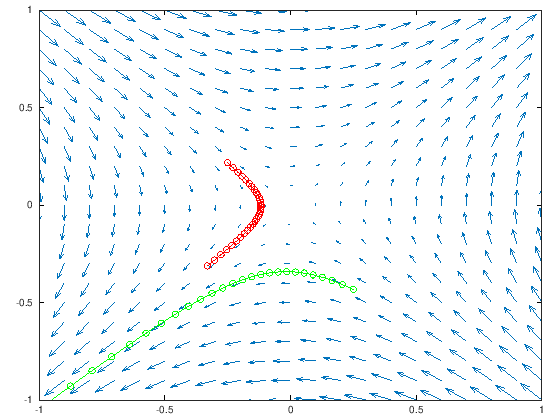

In [13]:
A = [0 1; 
     1 0];
helper3(A, .1)

b) Alkalmazzunk hasonlósági transzformációt $A$-ra. Mi történik a fázisképpel?

A2 =

   0.94807   0.31805
   0.31805  -0.94807

A =

   0.94807   0.31805
   0.31805  -0.94807



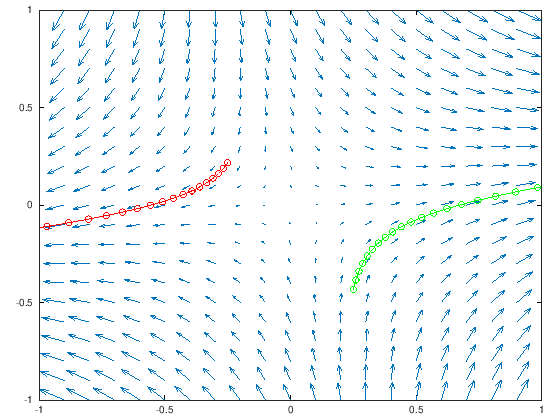

In [14]:
S = randi(100, [2 2]);
[Q, _] = qr(S);
A2 = Q' * A * Q
helper3(A2, .1)

c) Mik az eredeti és a transzformált rendszer sajátértékei? Feltéve, hogy $A$ diagonalizálható, milyen a diagonalizált rendszer fázisképe ?

In [19]:
eig(A)
eig(A2)

ans =

  -1
   1

ans =

  -1.00000
   1.00000



A =

Diagonal Matrix

  -1   0
   0   1



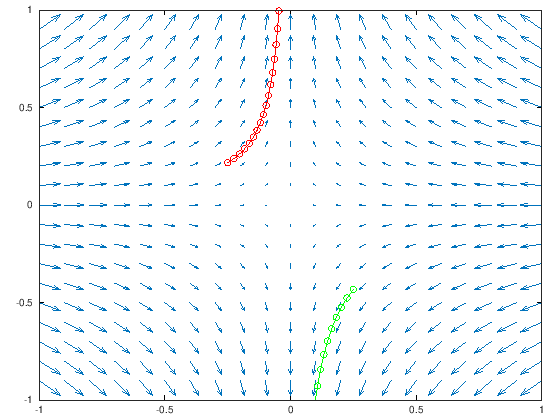

In [20]:
helper3(diag(eig(A)), .1)

d) Mi a pontos megoldást megadó képlet? $x(1) = e^{A\cdot 1} x(0)$

In [21]:
expm(A)

ans =

   1.5431   1.1752
   1.1752   1.5431



e) Közelítsük az $e^A$ mátrixot az EE módszer segítségével.

In [22]:
eA_approx = zeros(2);
h = .001;
[ts, ys] = explicit_euler(@(t, x)(A*x), 0:h:1, [1; 0]);
eA_approx(:, 1) = ys(:, end);
[ts, ys] = explicit_euler(@(t, x)(A*x), 0:h:1, [0; 1]);
eA_approx(:, 2) = ys(:, end)

eA_approx =

   1.5423   1.1746
   1.1746   1.5423



#### 3. feladat
A Hartman-Grobman-tétel értelmében ha $f:\mathbb{R}^2 \to \mathbb{R^2}$ elég szép, és a $0$ hiperbolikus egyensúlyi pontja, azaz $f(0) = 0$, valamint $A = f'(0)$ olyan, hogy $0 \notin \Re(\sigma(A))$, akkor az
$$
  \dot x = f(x)
$$
és az
$$
    \dot x = Ax
$$
egyenleteknek a $0$ körüli fázisképe 
bizonyos értelemben ekvivalens.

a) Konstruáljunk erre példát. Induljunk ki egy egyszerű mátrixból, keressünk hozzá megfelelő $f$ leképezést, azaz keressük a függvényt $f(x) = Ax + n(x)$ alakban, ahol $n'(0) = 0, n(0) = 0$.

b) Ábrázoljuk a két egyenlet $0$ körüli fázisképét.

#### 4. feladat
Tekintsük a

$$
    \sum_{k = 0}^s \alpha_k y_{n-k} = \sum_{k = 0}^s  \beta_k f_{n-k}
$$

formulával adott lineáris többlépéses módszereket. Tegyük fel, hogy $\alpha_0 = 1$ az egyértelműség kedvéért, valamint, hogy $\beta_0 = 0$, azaz explicit módszerről van szó.

a) Milyen $\alpha_k$, $\beta_k$ választással kapjuk vissza az explicit Euler módszert?

b) Implementáljunk egy nekünk tetsző paraméterezésű módszert ([inspiráció](https://en.wikipedia.org/wiki/Linear_multistep_method)).

c) Legyenek bemeneti paraméter az $\alpha$, $\beta$ együtthatóvektorok is, azaz egészítsük ki a lenti függvénydefiníciót.

In [25]:
function [ts, ys] = explicit_lmm(alphas, betas, f, ts, y0)
    
end

d) Az előző részfeladat megoldásának felhasználásával implementáljuk az EE módszert.

In [24]:
function [ts, ys] = explicit_euler_as_lmm(f, ts, y0)
   
end